In this notebook I'm going to load vibration data. The vibration data are sampled every minute for the first 6 seconds. I'm going to use vibration data to calculation 4 invariants.

In [1]:
rm(list=ls())

In [2]:
# Define the path to load data
data_path <- '../Data/';

load(file=paste0(data_path,'spectraJUNE.RData'))
load(file=paste0(data_path,'velocityJUNE.RData'))

In [3]:
n.col = ncol(input_spectra)

In [4]:
spectra <- as.matrix(input_spectra[,2:n.col])
velocity <- as.matrix(input_velocity[,2:n.col])

MAXVELOCITY <- apply(velocity, 1,max)
SQRT_FREQ_AMP <- apply(spectra, 1,function(x) sqrt(max(x)))
POWER <- apply(spectra, 1,function(x) sum(x^2))
base <- as.vector(spectra[1,])
diff <- sweep(spectra , 2 , base)
L2_SPECTRA_MAX <- apply(diff,1, function(x) sqrt(sum((x)^2)))

In [5]:
spectral_norms <- data.frame(input_spectra$TIME,MAXVELOCITY,SQRT_FREQ_AMP,POWER,L2_SPECTRA_MAX)

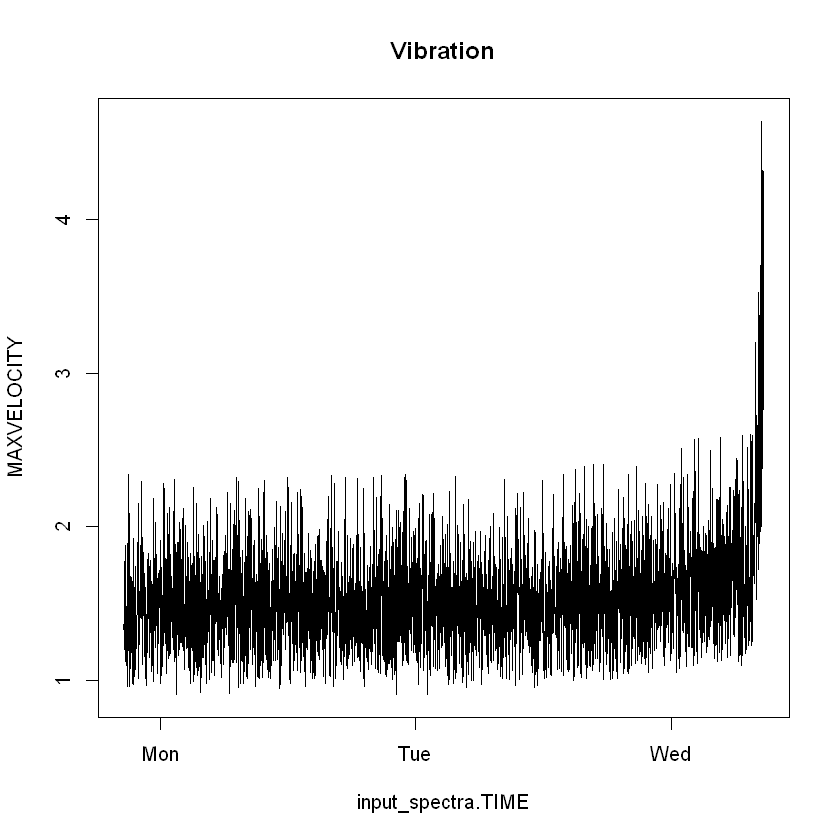

In [6]:
plot(spectral_norms[,1:2],t="l",main='Vibration')